In [2]:
# example: counting rainy days 

import numpy as np 
from vega_datasets import data 

# use DataFrame operations to extract rainfall as NumPy array 

rainfall_mm = np.array(
    data.seattle_weather().set_index("date")["precipitation"]["2015"]
)
len(rainfall_mm)

365

/tmp/ipykernel_200520/1721648248.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


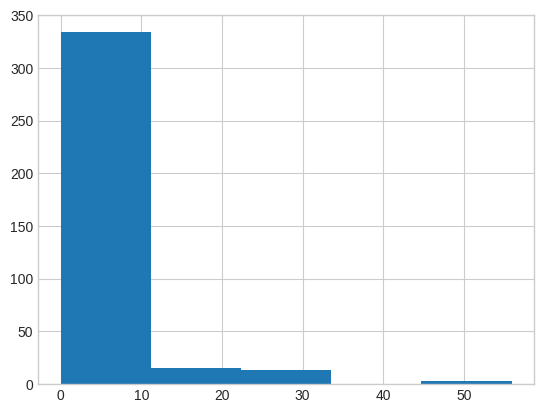

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")
plt.hist(rainfall_mm,5);

In [8]:
# comparison operators as Ufuncs

x = np.array([1,2,3,4,5])

x < 3 # less than

array([ True,  True, False, False, False])

In [9]:
x > 3, x <= 3, x >= 3 

(array([False, False, False,  True,  True]),
 array([ True,  True,  True, False, False]),
 array([False, False,  True,  True,  True]))

In [10]:
x != 3, x == 3 

(array([ True,  True, False,  True,  True]),
 array([False, False,  True, False, False]))

In [11]:
# element wise comparison of two arrays 
(2*x) == (x**2)

array([False,  True, False, False, False])

In [12]:
rng = np.random.default_rng(seed = 1701)
x = rng.integers(10, size=(3,4))
x 

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [13]:
x < 6 

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [14]:
# Working with the boolean arrays 

print(x)

[[9 4 0 3]
 [8 6 3 1]
 [3 7 4 0]]


In [15]:
# counting entities

# how many alues less than 6?
np.count_nonzero(x < 6)

8

In [16]:
np.sum(x < 6)

8

In [17]:
# how many values less than 6 in each row 
np.sum(x<6, axis = 1)

array([3, 2, 3])

In [18]:
# np.any/np.all for checking all set of values to the condition

# are there any values greater than B? 
np.any(x>8)

True

In [19]:
# are there any values less than zero?
np.any(x<0)

False

In [20]:
# are all values less than 10?
np.all(x<10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

In [22]:
# are all values in each row less than 8?
np.all(x<8, axis=1)

array([False, False,  True])

In [23]:
# boolean operators
np.sum( (rainfall_mm > 10) & (rainfall_mm < 20) )

16

In [26]:
print("number of days without rain:", np.sum(rainfall_mm == 0))
print("number of days with rain:", np.sum(rainfall_mm != 0))
print("days with more than 10 mm:", np.sum(rainfall_mm > 10))
print("rainy days with < 5 mm:", np.sum( (rainfall_mm > 0) & (rainfall_mm < 5)))

number of days without rain: 221
number of days with rain: 144
days with more than 10 mm: 34
rainy days with < 5 mm: 83


In [27]:
# boolean arrays as masks 
x 

array([[9, 4, 0, 3],
       [8, 6, 3, 1],
       [3, 7, 4, 0]])

In [28]:
x < 5 

array([[False,  True,  True,  True],
       [False, False,  True,  True],
       [ True, False,  True,  True]])

In [29]:
x[x<5]      # works as a select from 

array([4, 0, 3, 3, 1, 3, 4, 0])

In [35]:
# construct a mask for all rainy days 
rainy = (rainfall_mm > 0)

# construct a mask for all summer days  (june 21 is the 172 day)
days = np.arange(365)
summer = (days > 172) & (days < 262)



In [36]:
print("median precip on rainy days in 2015 mm:", np.median(rainfall_mm[rainy]))
print("median precip on summer days in 2015 mm:", np.median(rainfall_mm[summer]))
print("maximum precip on summer days in 2015 mm:", np.max(rainfall_mm[summer]))
print("median precip on non-summer rainy days mm:", 
      np.median(rainfall_mm[rainy & ~summer]))


median precip on rainy days in 2015 mm: 3.8
median precip on summer days in 2015 mm: 0.0
maximum precip on summer days in 2015 mm: 32.5
median precip on non-summer rainy days mm: 4.1


In [39]:
# using keywords and/or versus operators &/|
# &/|    - for EACH element evaluation 
# and/or - for WHOLE object evaluation 

A = np.array([1,0,1,0,1,0], dtype=bool)
B = np.array([1,1,1,0,1,1], dtype=bool)
print(A | B)
try:
    A or B 
except:
    print("for more than one element is abmigous")

[ True  True  True False  True  True]
for more than one element is abmigous
